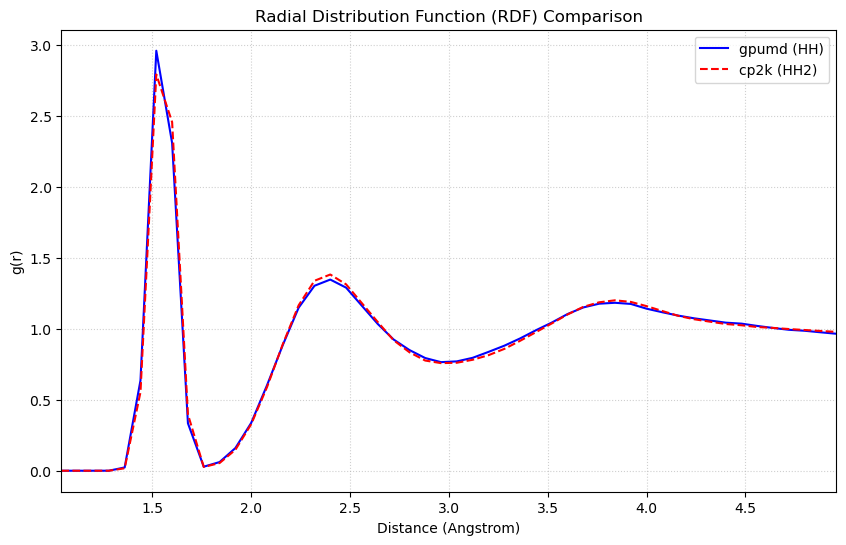

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Function to read data from file (skipping the first line)
def read_rdf_data(filename):
    """
    Reads data from a specified file, skipping the first line.
    Returns two arrays: distance (x-axis) and rdf (y-axis).
    """
    # Load data from the file, skipping the header line (skiprows=1)
    data = np.loadtxt(filename, skiprows=1)
    distance = data[:, 0]  # First column as x-axis
    rdf = data[:, 1]       # Second column as y-axis
    return distance, rdf

# Read data from both files
distance_oh, rdf_oh = read_rdf_data('rdf-HH.txt')
distance_oh2, rdf_oh2 = read_rdf_data('rdf-HH2.txt')

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot rdf-OH.txt data (gpumd label, solid line)
plt.plot(distance_oh, rdf_oh, color='blue', linestyle='-', label='gpumd (HH)')

# Plot rdf-OH2.txt data (cp2k label, dashed line)
plt.plot(distance_oh2, rdf_oh2, color='red', linestyle='--', label='cp2k (HH2)')

# Adding plot enhancements
plt.xlabel('Distance (Angstrom)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function (RDF) Comparison')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim(min(distance_oh[0], distance_oh2[0]), max(distance_oh[-1], distance_oh2[-1])) # Optional: set x-limits to cover full range of data
plt.savefig('rdf_comparison_HH.png', dpi=300)  # Save the figure as a PNG file
# Display the plot
plt.show()


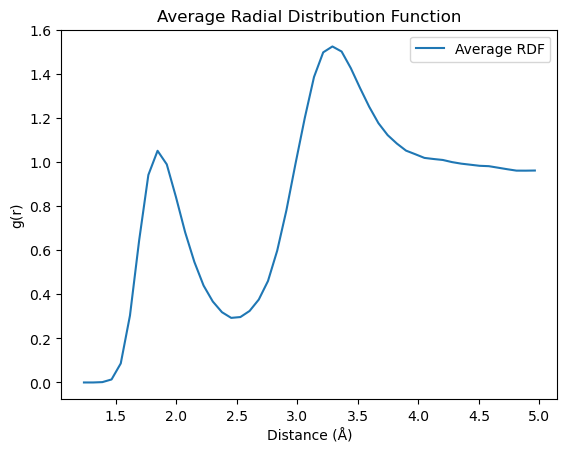

In [ ]:
import MDAnalysis as mda
import os
import numpy as np
from MDAnalysis import Universe
from MDAnalysis.analysis import rdf
import matplotlib.pyplot as plt
import os
from MDAnalysis import transformations
# 加载数据

file1 = os.path.join('dump.xyz')
u = Universe(file1)

# 设置 RDF 分析
rdf_analysis = None  # 初始化 RDF 分析对象
rdf_values_total = None  # 初始化总 RDF 值
num_frames = 0  # 计数帧数

dim = np.array([10, 10, 10, 90, 90, 90])
transform = mda.transformations.boxdimensions.set_dimensions(dim)
u.trajectory.add_transformations(transform)


# 在每一帧中选择原子
selection1 = u.select_atoms('name O')
selection2 = u.select_atoms('name H')

position1 = selection1.positions

# 创建新的 RDF 分析器
rdf_analysis = rdf.InterRDF(selection1, selection2,nbins=50,range=(1.2, 5.0))

# 计算 RDF
rdf_analysis.run(0,20000)

# --- Corrected part to write bins and rdf as two columns ---
# Combine the two 1D arrays into a single 2D array where each 1D array becomes a column
data_to_save = np.column_stack((rdf_analysis.results.bins, rdf_analysis.results.rdf))

np.savetxt(
    'rdf-OH.txt',
    data_to_save,
    fmt='%.6f',
    header='Distance (Angstrom)    g(r)'
)
# 绘制平均 RDF O-H
plt.plot(rdf_analysis.results.bins, rdf_analysis.results.rdf, label='Average RDF')
plt.xlabel('Distance (Å)')
plt.ylabel('g(r)')
plt.title('Average Radial Distribution Function')
plt.legend()
plt.show()


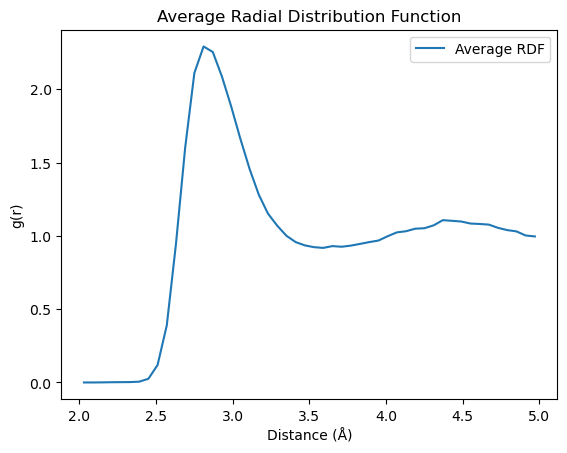

In [17]:
import MDAnalysis as mda
import os
import numpy as np
from MDAnalysis import Universe
from MDAnalysis.analysis import rdf
import matplotlib.pyplot as plt
import os
from MDAnalysis import transformations
# 加载数据





# 在每一帧中选择原子
selection1 = u.select_atoms('name O')
selection2 = u.select_atoms('name O')

position1 = selection1.positions

# 创建新的 RDF 分析器
rdf_analysis = rdf.InterRDF(selection1, selection2,nbins=50,range=(2, 5.0))

# 计算 RDF
rdf_analysis.run(0,20000)


# --- Corrected part to write bins and rdf as two columns ---
# Combine the two 1D arrays into a single 2D array where each 1D array becomes a column
data_to_save = np.column_stack((rdf_analysis.results.bins, rdf_analysis.results.rdf))

np.savetxt(
    'rdf-OO.txt',
    data_to_save,
    fmt='%.6f',
    header='Distance (Angstrom)    g(r)'
)
# 绘制平均 RDF O-O
plt.plot(rdf_analysis.results.bins, rdf_analysis.results.rdf, label='Average RDF')
plt.xlabel('Distance (Å)')
plt.ylabel('g(r)')
plt.title('Average Radial Distribution Function')
plt.legend()
plt.show()


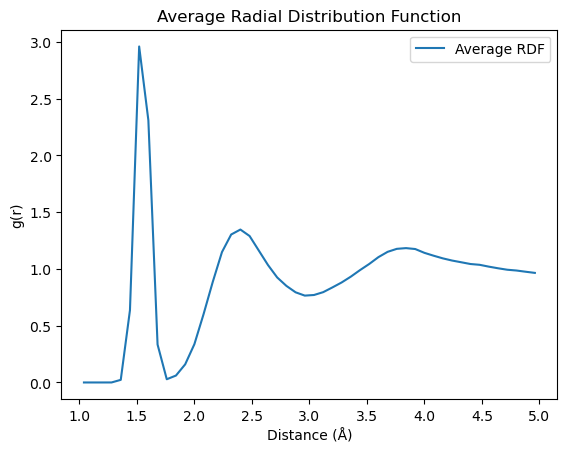

In [18]:
import MDAnalysis as mda
import os
import numpy as np
from MDAnalysis import Universe
from MDAnalysis.analysis import rdf
import matplotlib.pyplot as plt
import os
from MDAnalysis import transformations
# 加载数据




# 在每一帧中选择原子
selection1 = u.select_atoms('name H')
selection2 = u.select_atoms('name H')

position1 = selection1.positions

# 创建新的 RDF 分析器
rdf_analysis = rdf.InterRDF(selection1, selection2,nbins=50,range=(1, 5.0))

# 计算 RDF
rdf_analysis.run(0,20000)


# --- Corrected part to write bins and rdf as two columns ---
# Combine the two 1D arrays into a single 2D array where each 1D array becomes a column
data_to_save = np.column_stack((rdf_analysis.results.bins, rdf_analysis.results.rdf))

np.savetxt(
    'rdf-HH.txt',
    data_to_save,
    fmt='%.6f',
    header='Distance (Angstrom)    g(r)'
)
# 绘制平均 RDF H-H
plt.plot(rdf_analysis.results.bins, rdf_analysis.results.rdf, label='Average RDF')
plt.xlabel('Distance (Å)')
plt.ylabel('g(r)')
plt.title('Average Radial Distribution Function')
plt.legend()
plt.show()
